## 爬蟲結果
因為每個app留言數量不同的關係，會有爬出的結果數量不同的狀況，基本上我已經盡力取出最多的評論數，若還有不夠的地方再通知我，可能就要用另外的方法來爬蟲。

In [1]:
import pandas as pd
import numpy as np
from app_store_scraper import AppStore
import matplotlib.pyplot as plt

In [2]:
# DuoSwim
duoswim = AppStore(country='gb', app_name='DuoSwim', app_id='1548487050')
duoswim.review(how_many=1000)

print('\n', duoswim.reviews[0], '\n')

duoswimdf = pd.DataFrame(np.array(duoswim.reviews), columns=['review'])
duoswimdf2 = duoswimdf.join(pd.DataFrame(duoswimdf.pop('review').tolist()))

duoswimdf2 = duoswimdf2.drop('developerResponse', axis=1)
duoswimdf2 = duoswimdf2.drop('isEdited', axis=1)
duoswimdf2 = duoswimdf2.drop('userName', axis=1)
# duoswimdf2 = duoswimdf2.drop('date', axis=1)

# duoswimdf2.to_csv('crawler_result/duoswim.csv', escapechar='|')

2023-09-05 21:05:28,099 [INFO] Base - Initialised: AppStore('gb', 'duoswim', 1548487050)
2023-09-05 21:05:28,100 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/gb/app/duoswim/id1548487050
2023-09-05 21:05:28,343 [INFO] Base - [id:1548487050] Fetched 15 reviews (15 fetched in total)



 {'date': datetime.datetime(2023, 2, 16, 16, 47, 48), 'developerResponse': {'id': 34970792, 'body': 'Hi, thanks for your excellent feedback, we really appreciate it. We have some great news! The latest update includes improvements to the Apple Watch layout, so you should no longer miss any information during your workout. The development team are working hard to implement adjustable turnaround times. This will be made available soon. We will keep you updated with our progress. Happy swimming!', 'modified': '2023-02-20T12:47:51Z'}, 'review': 'Fantastic app, it changed my way to workout in the swimming pool. It’s less expensive than others with plenty of workouts for all kinds of swimmers. Helpful and friendly customer service too.\nI would just improve the Apple Watch layout when working out because the top section gets covered by the watch time and water lock sign, so you miss out some info the app displays. \nI also find the pace at which the beginner repetitions are set to be too fa

In [3]:
duoswimdf2

,date,review,rating,title
0,2023-02-16 16:47:48,"Fantastic app, it changed my way to workout in...",5,"Amazing app, some improvements needed"
1,2022-06-12 10:13:29,Finally a swim app that looks great and provid...,5,A brilliant app
2,2023-01-14 18:32:17,Positive: The coaching side seems ok and decen...,2,"Watch app is very limited, integration apple f..."
3,2022-06-11 19:02:41,This app is very easy to use. I love how you c...,5,Great for all swimmers!
4,2022-05-30 08:49:37,Perfect app. Used to love swimming but hadn’t ...,5,Got me back into the pool - loving it !!
5,2022-06-12 09:45:46,"After trying a few apps for my swimming, the D...",5,Best swimming app
6,2021-05-11 13:52:59,This is the first app I have found where I can...,5,Amazing tool for swim training
7,2022-01-28 23:24:05,Very nice app not so complicated as others. I ...,5,5 star App
8,2021-05-11 10:16:11,This app was exactly what I needed to start tr...,5,Just what I needed!
9,2021-04-29 08:24:46,I currently swim 2-3 times a week and this app...,5,Brilliant Swimming App!


In [25]:
print(f'latest review timestamp: {max(duoswimdf2["date"])}')
print(f'oldest review timestamp: {min(duoswimdf2["date"])}')
print(f'the number of reviews: {len(duoswimdf2)}')
duoswimdf2['date']

latest review timestamp: 2023-02-16 16:47:48
oldest review timestamp: 2021-04-29 08:24:46
the number of reviews: 15


0    2023-02-16 16:47:48
1    2022-06-12 10:13:29
2    2023-01-14 18:32:17
3    2022-06-11 19:02:41
4    2022-05-30 08:49:37
5    2022-06-12 09:45:46
6    2021-05-11 13:52:59
7    2022-01-28 23:24:05
8    2021-05-11 10:16:11
9    2021-04-29 08:24:46
10   2022-01-21 15:18:34
11   2021-04-29 14:06:09
12   2021-05-18 11:06:46
13   2022-01-22 14:37:57
14   2022-01-21 14:24:20
Name: date, dtype: datetime64[ns]

In [61]:
duoswim_2023_cnt = 0
duoswim_2022_cnt = 0
duoswim_2021_cnt = 0

for timestamp in duoswimdf2['date']:
    yr = timestamp.year
    if yr==2023:
        duoswim_2023_cnt += 1
    elif yr==2022:
        duoswim_2022_cnt += 1
    else:
        duoswim_2021_cnt += 1

print(f'2023: {duoswim_2023_cnt}\n2022: {duoswim_2022_cnt}\n2021: {duoswim_2021_cnt}')

2023: 2
2022: 8
2021: 5


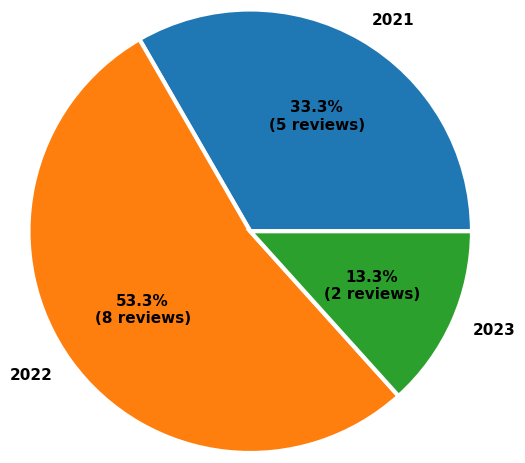

In [60]:
duoswim_x = [duoswim_2021_cnt, duoswim_2022_cnt, duoswim_2023_cnt]

def func(each, all):
  t = int((each*sum(all)/100))                  # 透過百分比反推原本的數值
  return f'{each:.1f}%\n({t} reviews)'    # 使用文字格式化的方式，顯示內容


plt.pie(duoswim_x,
        radius=1.5,
        labels=[2021, 2022, 2023],
        textprops={'color':'black', 'weight':'bold', 'size':11},  # 設定文字樣式
        autopct=lambda i: func(i,duoswim_x),
        wedgeprops={'linewidth':3,'edgecolor':'w'})

plt.show()

In [63]:
# MySwimPro
myswimpro = AppStore(country='us', app_name='MySwimPro', app_id='994386450')
myswimpro.review(how_many=3800)

print(myswimpro.reviews[0])

myswimprodf = pd.DataFrame(np.array(myswimpro.reviews), columns=['review'])
myswimprodf2 = myswimprodf.join(pd.DataFrame(myswimprodf.pop('review').tolist()))

myswimprodf2 = myswimprodf2.drop('developerResponse', axis=1)
myswimprodf2 = myswimprodf2.drop('isEdited', axis=1)
myswimprodf2 = myswimprodf2.drop('userName', axis=1)
# myswimprodf2 = myswimprodf2.drop('date', axis=1)

# myswimprodf2.to_csv('crawler_result/myswimpro.csv', escapechar='|')

2023-09-05 22:58:07,923 [INFO] Base - Initialised: AppStore('us', 'myswimpro', 994386450)
2023-09-05 22:58:07,924 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/myswimpro/id994386450
2023-09-05 22:58:09,531 [INFO] Base - [id:994386450] Fetched 504 reviews (504 fetched in total)


{'date': datetime.datetime(2023, 1, 27, 22, 31, 43), 'review': 'Got the app 5 weeks ago and I have made more progress in that time than the whole 1.5 years of swimming on my own before. The customized coaching is great and the app certainly pushes you but never has unreasonably high expectations of you. The ability to customize what goals you are working towards, how often you swim, how fast you swim, and what strokes you swim are all excellent features. Only negative I’ve experienced is minor bugs with sync issues between the app and my smartwatch. This hasn’t impacted my ability to use all the features just needed to use work arounds with how the workout is accessed by the watch. Minor bugs stop me from giving it a 5* but I am still loving the app. If I could see some additional features the biggest would be the ability to go back a set/split in a workout. Sometimes I can’t keep up with the times it says and I fall behind so this would help keep me on track. Also, the ability to togg

In [64]:
myswimprodf2

,date,review,rating,title
0,2023-01-27 22:31:43,Got the app 5 weeks ago and I have made more p...,4,My Swim Pro Review
1,2023-08-29 11:46:37,I am not a competíos swimmer but I enjoy it an...,5,Great investment
2,2023-03-15 19:44:28,Very impressed. As a long time swimmer with a...,5,From Analytics to Coaching
3,2019-11-12 20:14:20,"Let’s be honest, for many of us, our best comp...",5,You can’t believe all that’s packed into this ...
4,2021-11-22 20:52:55,First and foremost SwimPro is a great app with...,4,Great but not fail safe
...,...,...,...,...
499,2019-08-31 01:41:24,Do not get this app! It will work for a while...,1,Very Buggy and Incredibly Disapointing
500,2017-01-02 22:18:43,I've used this app 3 times and all 3 times I g...,5,Dissatisfied
501,2018-08-21 18:36:42,I downloaded the app to see if I could use it ...,1,DO NOT DOWNLOAD THE APP AND THEN CANCEL!!!!
502,2018-07-16 23:13:00,App is useless. Cant even log in using email. ...,1,Disappointing


In [67]:
print(f'latest review timestamp: {max(myswimprodf2["date"])}')
print(f'oldest review timestamp: {min(myswimprodf2["date"])}')
print(f'the number of reviews: {len(myswimprodf2)}')
myswimprodf2['date']

latest review timestamp: 2023-08-29 20:33:05
oldest review timestamp: 2015-06-15 12:43:25
the number of reviews: 504


0     2023-01-27 22:31:43
1     2023-08-29 11:46:37
2     2023-03-15 19:44:28
3     2019-11-12 20:14:20
4     2021-11-22 20:52:55
              ...        
499   2019-08-31 01:41:24
500   2017-01-02 22:18:43
501   2018-08-21 18:36:42
502   2018-07-16 23:13:00
503   2016-07-31 15:02:51
Name: date, Length: 504, dtype: datetime64[ns]

In [69]:
myswimpro_2023_cnt = 0
myswimpro_2022_cnt = 0
myswimpro_2021_cnt = 0
myswimpro_2020_cnt = 0
myswimpro_2019_cnt = 0
myswimpro_2018_cnt = 0
myswimpro_2017_cnt = 0
myswimpro_2016_cnt = 0
myswimpro_2015_cnt = 0


for timestamp in myswimprodf2['date']:
    yr = timestamp.year
    if yr==2023:
        myswimpro_2023_cnt += 1
    elif yr==2022:
        myswimpro_2022_cnt += 1
    elif yr==2021:
        myswimpro_2021_cnt += 1
    elif yr==2020:
        myswimpro_2020_cnt += 1
    elif yr==2019:
        myswimpro_2019_cnt += 1
    elif yr==2018:
        myswimpro_2018_cnt += 1
    elif yr==2017:
        myswimpro_2017_cnt += 1
    elif yr==2016:
        myswimpro_2016_cnt += 1
    else:
        myswimpro_2015_cnt += 1


print(myswimpro_2023_cnt, myswimpro_2022_cnt, myswimpro_2021_cnt, myswimpro_2020_cnt, myswimpro_2019_cnt, myswimpro_2018_cnt, myswimpro_2017_cnt, myswimpro_2016_cnt, myswimpro_2015_cnt)


34 77 61 56 73 59 76 45 23


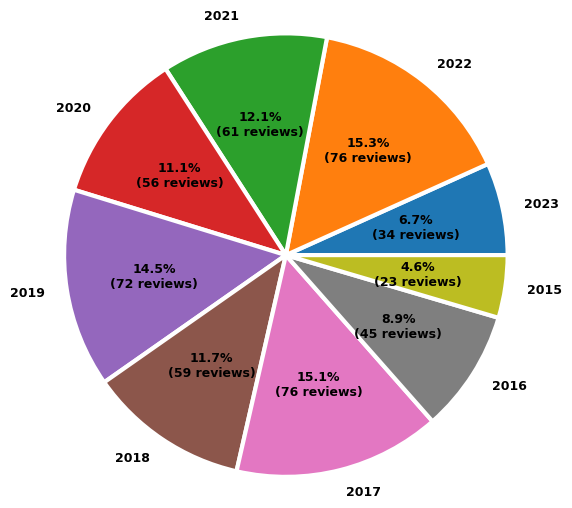

In [75]:
myswimpro_x = [myswimpro_2023_cnt, myswimpro_2022_cnt, myswimpro_2021_cnt, myswimpro_2020_cnt, myswimpro_2019_cnt, myswimpro_2018_cnt, myswimpro_2017_cnt, myswimpro_2016_cnt, myswimpro_2015_cnt]

def func(each, all):
  t = int((each*sum(all)/100))                  # 透過百分比反推原本的數值
  return f'{each:.1f}%\n({t} reviews)'    # 使用文字格式化的方式，顯示內容


plt.pie(myswimpro_x,
        radius=1.5,
        labels=[2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015],
        textprops={'color':'black', 'weight':'bold', 'size':9},  # 設定文字樣式
        autopct=lambda i: func(i,myswimpro_x),
        wedgeprops={'linewidth':3,'edgecolor':'w'})

plt.show()

In [76]:
# Swim.com
swimcom = AppStore(country='us', app_name='Swim.com', app_id='956030704')
swimcom.review(how_many=1000)

print(swimcom.reviews[0])

swimcomdf = pd.DataFrame(np.array(swimcom.reviews), columns=['review'])
swimcomdf2 = swimcomdf.join(pd.DataFrame(swimcomdf.pop('review').tolist()))

swimcomdf2 = swimcomdf2.drop('developerResponse', axis=1)
swimcomdf2 = swimcomdf2.drop('isEdited', axis=1)
swimcomdf2 = swimcomdf2.drop('userName', axis=1)
# swimcomdf2 = swimcomdf2.drop('date', axis=1)

# swimcomdf2.to_csv('crawler_result/swimcom.csv', escapechar='|')

2023-09-05 23:12:09,553 [INFO] Base - Initialised: AppStore('us', 'swim-com', 956030704)
2023-09-05 23:12:09,554 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/swim-com/id956030704
2023-09-05 23:12:14,338 [INFO] Base - [id:956030704] Fetched 231 reviews (231 fetched in total)


{'date': datetime.datetime(2018, 10, 15, 14, 50, 36), 'developerResponse': {'id': 6236997, 'body': 'Thank you for your feedback. We recently released version 2.3.2 which fixed the tracking issue for Apple Watch users. In addition, we recently (Friday of last week) completed revision of our technology roadmap and feature set. Expect to see several changes implemented over the next 60 days. These changes will significantly enhance our analytics capabilities including more detailed breakdown by different parameters. \n\nPlease keep sharing your feedback and ideas for enhancement. We are listening and engaging with our users to help develop our roadmap and beta test changes.', 'modified': '2018-12-04T13:37:26Z'}, 'review': "After using this app for two years on a Pebble watch, it was hit or miss.  Moving on to an Apple Watch 2, the interface was better but motion tracking and distance recording was only slightly better.  Recent updates under iOS 12 and WatchOS 5 give much better tracking i

In [8]:
swimcomdf2

,review,rating,title
0,After using this app for two years on a Pebble...,4,Improved tracking but data analysis still weak
1,"Strictly from an App Design standpoint, it bre...",3,"It has potential, but still needs work."
2,They’ve made some good improvements to the app...,4,"Good, but a little wonky with stroke detection"
3,"At 70 yo I sometimes ( no, all the time) need ...",5,Use it for motivation
4,This app has all the potential of being great ...,2,Inaccurate/buggy
...,...,...,...
226,I have used this app with my old Apple Watch S...,2,Tracking still way off for me
227,I want to use this app. I love swim.com and us...,2,Inaccurate stroke accuracy
228,***Update - 02-10-2017\nMore updates have been...,2,Great Concept. Poor Execution.
229,App.has gone from functional to brick. Says it...,2,Dead app


In [77]:
print(f'latest review timestamp: {max(swimcomdf2["date"])}')
print(f'oldest review timestamp: {min(swimcomdf2["date"])}')
print(f'the number of reviews: {len(swimcomdf2)}')
swimcomdf2['date']

latest review timestamp: 2023-08-26 21:30:40
oldest review timestamp: 2015-04-17 22:49:16
the number of reviews: 231


0     2018-10-15 14:50:36
1     2019-07-23 14:42:06
2     2023-04-25 01:11:37
3     2020-07-28 14:19:24
4     2018-03-04 18:09:33
              ...        
226   2019-03-02 23:55:00
227   2018-09-30 20:31:47
228   2017-02-10 17:59:18
229   2016-07-18 14:54:35
230   2016-01-02 18:59:18
Name: date, Length: 231, dtype: datetime64[ns]

In [78]:
swimcom_2023_cnt = 0
swimcom_2022_cnt = 0
swimcom_2021_cnt = 0
swimcom_2020_cnt = 0
swimcom_2019_cnt = 0
swimcom_2018_cnt = 0
swimcom_2017_cnt = 0
swimcom_2016_cnt = 0
swimcom_2015_cnt = 0


for timestamp in swimcomdf2['date']:
    yr = timestamp.year
    if yr==2023:
        swimcom_2023_cnt += 1
    elif yr==2022:
        swimcom_2022_cnt += 1
    elif yr==2021:
        swimcom_2021_cnt += 1
    elif yr==2020:
        swimcom_2020_cnt += 1
    elif yr==2019:
        swimcom_2019_cnt += 1
    elif yr==2018:
        swimcom_2018_cnt += 1
    elif yr==2017:
        swimcom_2017_cnt += 1
    elif yr==2016:
        swimcom_2016_cnt += 1
    else:
        swimcom_2015_cnt += 1


print(swimcom_2023_cnt, swimcom_2022_cnt, swimcom_2021_cnt, swimcom_2020_cnt, swimcom_2019_cnt, swimcom_2018_cnt, swimcom_2017_cnt, swimcom_2016_cnt, swimcom_2015_cnt)

13 16 20 24 32 14 56 47 9


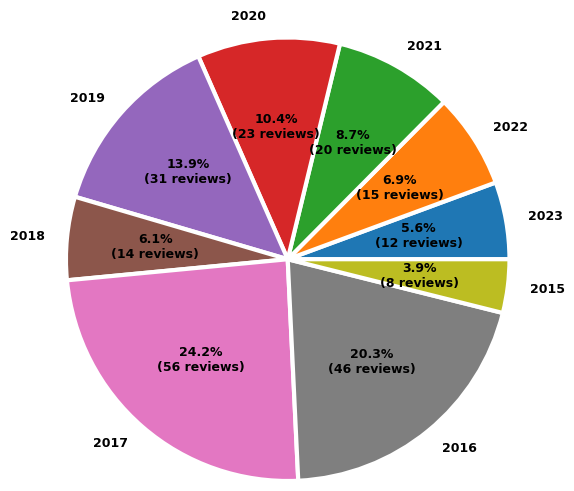

In [79]:
swimcom_x = [swimcom_2023_cnt, swimcom_2022_cnt, swimcom_2021_cnt, swimcom_2020_cnt, swimcom_2019_cnt, swimcom_2018_cnt, swimcom_2017_cnt, swimcom_2016_cnt, swimcom_2015_cnt]

def func(each, all):
  t = int((each*sum(all)/100))                  # 透過百分比反推原本的數值
  return f'{each:.1f}%\n({t} reviews)'    # 使用文字格式化的方式，顯示內容


plt.pie(swimcom_x,
        radius=1.5,
        labels=[2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015],
        textprops={'color':'black', 'weight':'bold', 'size':9},  # 設定文字樣式
        autopct=lambda i: func(i,swimcom_x),
        wedgeprops={'linewidth':3,'edgecolor':'w'})

plt.show()

In [80]:
# FORM
form = AppStore(country='us', app_name='FORM Swim', app_id='1321117442')
form.review(how_many=2100)

print(form.reviews[0])

formdf = pd.DataFrame(np.array(form.reviews), columns=['review'])
formdf2 = formdf.join(pd.DataFrame(formdf.pop('review').tolist()))

formdf2 = formdf2.drop('developerResponse', axis=1)
formdf2 = formdf2.drop('isEdited', axis=1)
formdf2 = formdf2.drop('userName', axis=1)
# formdf2 = formdf2.drop('date', axis=1)

# formdf2.to_csv('crawler_result/form.csv', escapechar='|')

2023-09-05 23:20:09,812 [INFO] Base - Initialised: AppStore('us', 'form-swim', 1321117442)
2023-09-05 23:20:09,813 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/form-swim/id1321117442
2023-09-05 23:20:10,928 [INFO] Base - [id:1321117442] Fetched 61 reviews (61 fetched in total)


{'date': datetime.datetime(2020, 8, 4, 11, 7, 47), 'developerResponse': {'id': 17008952, 'body': 'Thanks for your awesome feedback!', 'modified': '2020-07-31T17:09:09Z'}, 'review': 'I like sport gadgets, but usually 9 out of 10 times my enthusiasm ends in great disappointment. However, the Form swim goggles have by far exceeded my expectations - they simply work. All the features advertised work better than expected and the app is a solid companion of the goggles. If you want to focus on your swim and forget counting laps or looking up for your time, the Form swim goggles are the best solution. They are also for me personally one of the best fitting goggles I’ve ever used, but that might be different for others people. I am really grateful for the team having developed these goggles. I wish more people knew about them. They are now also sold in Europe, but I was able to order them from the US.\nP. S. : last week I tried out the new open water feature after a firmware update. I connecte

In [81]:
formdf2

,date,review,rating,title
0,2020-08-04 11:07:47,"I like sport gadgets, but usually 9 out of 10 ...",5,Amazing! Now even better 😃
1,2021-08-02 17:08:07,My biggest question was if I was going to be a...,5,Very motivating
2,2020-11-25 14:41:27,This has been a game changer in how I swim. Fi...,5,I love these goggles
3,2022-08-31 15:57:28,The googles are fine and the workout generatio...,3,"It’s fine, but not revolutionary"
4,2023-03-13 06:25:25,This and bone conduction headphones have me sw...,5,Made me fall back in love with swimming
...,...,...,...,...
56,2019-08-11 16:56:51,As described in title,1,Unable to select goggle name in pairing setup....
57,2023-04-05 18:22:18,It recognizes freestyle but all my breast stro...,1,Bad at stroke detection
58,2020-11-13 12:30:30,I was excited when I first saw the Form goggle...,5,Great Training Tech
59,2021-09-30 00:45:51,"Great goggles, but major sync issues to Apple ...",2,Does not sync to Apple Health


In [82]:
print(f'latest review timestamp: {max(formdf2["date"])}')
print(f'oldest review timestamp: {min(formdf2["date"])}')
print(f'the number of reviews: {len(formdf2)}')
formdf2['date']

latest review timestamp: 2023-06-20 01:43:57
oldest review timestamp: 2019-08-11 16:56:51
the number of reviews: 61


0    2020-08-04 11:07:47
1    2021-08-02 17:08:07
2    2020-11-25 14:41:27
3    2022-08-31 15:57:28
4    2023-03-13 06:25:25
             ...        
56   2019-08-11 16:56:51
57   2023-04-05 18:22:18
58   2020-11-13 12:30:30
59   2021-09-30 00:45:51
60   2019-08-14 21:59:42
Name: date, Length: 61, dtype: datetime64[ns]

In [83]:
form_2023_cnt = 0
form_2022_cnt = 0
form_2021_cnt = 0
form_2020_cnt = 0
form_2019_cnt = 0



for timestamp in swimcomdf2['date']:
    yr = timestamp.year
    if yr==2023:
        form_2023_cnt += 1
    elif yr==2022:
        form_2022_cnt += 1
    elif yr==2021:
        form_2021_cnt += 1
    elif yr==2020:
        form_2020_cnt += 1
    else:
        form_2019_cnt += 1


print(form_2023_cnt, form_2022_cnt, form_2021_cnt, form_2020_cnt, swimcom_2019_cnt)

13 16 20 24 32


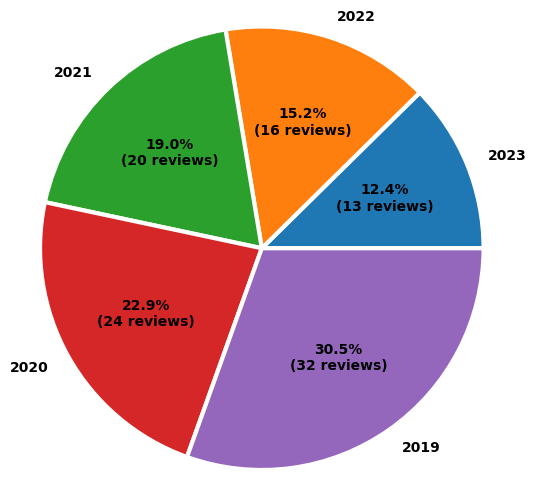

In [88]:
form_x = [form_2023_cnt, form_2022_cnt, form_2021_cnt, form_2020_cnt, swimcom_2019_cnt]

def func(each, all):
  t = int((each*sum(all)/100))                  # 透過百分比反推原本的數值
  return f'{each:.1f}%\n({t} reviews)'    # 使用文字格式化的方式，顯示內容


plt.pie(form_x,
        radius=1.5,
        labels=[2023, 2022, 2021, 2020, 2019],
        textprops={'color':'black', 'weight':'bold', 'size':10},  # 設定文字樣式
        autopct=lambda i: func(i,form_x),
        wedgeprops={'linewidth':3,'edgecolor':'w'})

plt.show()

In [91]:
# SwimUp
swimup = AppStore(country='us', app_name='SwimUp', app_id='1477061412')
swimup.review(how_many=50)

print(swimup.reviews[0])

swimupdf = pd.DataFrame(np.array(swimup.reviews), columns=['review'])
swimupdf2 = swimupdf.join(pd.DataFrame(swimupdf.pop('review').tolist()))

swimupdf2 = swimupdf2.drop('developerResponse', axis=1)
swimupdf2 = swimupdf2.drop('isEdited', axis=1)
swimupdf2 = swimupdf2.drop('userName', axis=1)
# swimupdf2 = swimupdf2.drop('date', axis=1)

# swimupdf2.to_csv('crawler_result/swimup.csv', escapechar='|')

2023-09-05 23:29:19,790 [INFO] Base - Initialised: AppStore('us', 'swimup', 1477061412)
2023-09-05 23:29:19,791 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/swimup/id1477061412
2023-09-05 23:29:20,125 [INFO] Base - [id:1477061412] Fetched 8 reviews (8 fetched in total)


{'date': datetime.datetime(2023, 5, 7, 17, 56), 'review': 'Amazing app, amazing coach and superb courses. I am enjoying the app so much and it motivates me to go at least twice a week for swim. I find courses are very well made and help any aspiring swimmer at all levels. \nI used to swim but the coach had changed my swim style and technique so much and it improved my swimming endurance and skill to a great extent. \nThank you for the wonderful service. The subscription is very well worth. In fact I would say you get lot more than you pay if you are persistent with the workouts and the courses', 'rating': 5, 'isEdited': False, 'userName': 'satheeshka', 'title': 'Amazing app'}


In [92]:
swimupdf2

,date,review,rating,title
0,2023-05-07 17:56:00,"Amazing app, amazing coach and superb courses....",5,Amazing app
1,2022-01-19 21:25:36,Tried a few training apps for getting into swi...,5,Best swimming app
2,2023-04-04 14:55:04,I have been trying to learn how to freestyle w...,4,Thank you!
3,2020-02-17 07:20:49,"Great app! Simple as it is, works good for beg...",5,Easy-peasy app
4,2023-05-04 14:25:04,They put me on 2 levels before champion but th...,2,Honest oppinion of a 17 year old on a swim team
5,2021-10-04 01:08:58,Thank you guys. Appreciate your work.,5,Great App.
6,2021-08-01 05:34:55,I love Swimup’s YouTube channel so I was reall...,3,"I really want to like the app, I really do"
7,2021-12-09 13:54:33,No voice tutorials makes these videos useless.,1,No voice


In [93]:
print(f'latest review timestamp: {max(swimupdf2["date"])}')
print(f'oldest review timestamp: {min(swimupdf2["date"])}')
print(f'the number of reviews: {len(swimupdf2)}')
swimupdf2['date']

latest review timestamp: 2023-05-07 17:56:00
oldest review timestamp: 2020-02-17 07:20:49
the number of reviews: 8


0   2023-05-07 17:56:00
1   2022-01-19 21:25:36
2   2023-04-04 14:55:04
3   2020-02-17 07:20:49
4   2023-05-04 14:25:04
5   2021-10-04 01:08:58
6   2021-08-01 05:34:55
7   2021-12-09 13:54:33
Name: date, dtype: datetime64[ns]

In [96]:
swimup_2023_cnt = 0
swimup_2022_cnt = 0
swimup_2021_cnt = 0
swimup_2020_cnt = 0

for timestamp in swimupdf2['date']:
    yr = timestamp.year
    if yr==2023:
        swimup_2023_cnt += 1
    elif yr==2022:
        swimup_2022_cnt += 1
    elif yr==2021:
        swimup_2021_cnt += 1
    else:
        swimup_2020_cnt += 1

print(swimup_2023_cnt, swimup_2022_cnt, swimup_2021_cnt, swimup_2020_cnt)

3 1 3 1


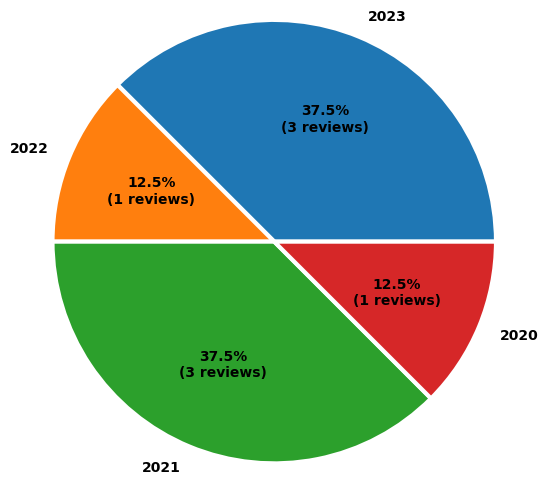

In [99]:
swimup_x = [swimup_2023_cnt, swimup_2022_cnt, swimup_2021_cnt, swimup_2020_cnt]

def func(each, all):
  t = int((each*sum(all)/100))                  # 透過百分比反推原本的數值
  return f'{each:.1f}%\n({t} reviews)'    # 使用文字格式化的方式，顯示內容


plt.pie(swimup_x,
        radius=1.5,
        labels=[2023, 2022, 2021, 2020],
        textprops={'color':'black', 'weight':'bold', 'size':10},  # 設定文字樣式
        autopct=lambda i: func(i,swimup_x),
        wedgeprops={'linewidth':3,'edgecolor':'w'})

plt.show()

## 關鍵字分析
這邊用一些簡單的分析，供你們參考

In [95]:
import yake
from keybert import KeyBERT

In [25]:
kw_model = KeyBERT(model='all-mpnet-base-v2')

2023-09-03 00:38:12,258 [INFO] sentence_transformers.SentenceTransformer - Load pretrained SentenceTransformer: all-mpnet-base-v2
2023-09-03 00:38:45,440 [INFO] sentence_transformers.SentenceTransformer - Use pytorch device: cpu


In [68]:
# original output of the model
keywords = kw_model.extract_keywords(text, 
                                     keyphrase_ngram_range=(1, 2), 
                                     stop_words='english', 
                                     highlight=True,
                                     top_n=10,)
colored_text = keywords

keywords_list= list(dict(keywords).keys())
print(keywords_list)

Amazing app coach and superb courses am enjoying the app so much and it motivates me to go at least twice week for 
swim find courses are very well made and help any aspiring swimmer all levels used to swim but the coach had 
changed my swim style and technique so much and it improved my swimming endurance and skill to great extent Thank 
you for the wonderful service The subscription is very well worth In fact would say you get lot more than you pay 
if you are persistent with the workouts and the courses

['enjoying app', 'subscription worth', 'swim courses', 'amazing app', 'aspiring swimmer', 'improved swimming', 'app amazing', 'swim coach', 'used swim', 'week swim']


In [ ]:
# DuoSwim
duoswimls = [duoswimdf2['review'][i] for i in range(len(duoswimdf2))]
duoswimdf2['keywords_by_method1'] = duoswimls
duoswimdf2['keywords_by_method2'] = duoswimls
for i in range(len(duoswimdf2)):
    # method 1
    kw_extractor = yake.KeywordExtractor(top=10, stopwords=None)
    keywords1 = kw_extractor.extract_keywords(text=duoswimls[i])
    keywords_list1 = []
    for kw, v in keywords1:
        keywords_list1.append(kw)
    duoswimdf2['keywords_by_method1'][i] = keywords_list1
    # method 2
    keywords2 = kw_model.extract_keywords(duoswimls[i], 
                                     keyphrase_ngram_range=(1, 2), 
                                     stop_words='english', 
                                     highlight=True,
                                     top_n=10)
    keywords_list2 = list(dict(keywords2).keys())
    duoswimdf2['keywords_by_method2'][i] = keywords_list2

In [103]:
duoswimdf2.to_csv('crawler_result/duoswim_with_keywords.csv', escapechar='|')
duoswimdf2

,review,rating,title,keywords_by_method1,keywords_by_method2
0,"Fantastic app, it changed my way to workout in...",5,"Amazing app, some improvements needed","[swimming pool, Fantastic app, Apple Watch lay...","[fantastic app, great app, apple watch, app st..."
1,Finally a swim app that looks great and provid...,5,A brilliant app,"[superb workouts, Finally a swim, swim app, Fi...","[swim app, apple watch, impressed app, app, sw..."
2,Positive: The coaching side seems ok and decen...,2,"Watch app is very limited, integration apple f...","[decent price compared, decent price, price co...","[rate swim, apple fitness, available swims, sw..."
3,This app is very easy to use. I love how you c...,5,Great for all swimmers!,"[app, phone-watch connected app, Swim, n’t fau...","[workouts watch, apple watch, phone watch, syn..."
4,Perfect app. Used to love swimming but hadn’t ...,5,Got me back into the pool - loving it !!,"[Perfect app, Perfect, n’t regularly swam, app...","[swims times, app used, perfect app, love swim..."
5,"After trying a few apps for my swimming, the D...",5,Best swimming app,"[DuoSwim app, swimming, DuoSwim, favourite, co...","[duoswim app, swimming duoswim, duoswim, apps ..."
6,This is the first app I have found where I can...,5,Amazing tool for swim training,"[follow to improve, training sessions, session...","[improve swimming, swimming range, training se..."
7,Very nice app not so complicated as others. I ...,5,5 star App,"[nice app, nice, app, complicated, journey fro...","[nice app, app complicated, format workouts, a..."
8,This app was exactly what I needed to start tr...,5,Just what I needed!,"[effectively and efficiently, needed to start,...","[pool app, plans workouts, motivated pool, rec..."
9,I currently swim 2-3 times a week and this app...,5,Brilliant Swimming App!,"[swim 2-3 times, times a week, training plans,...","[swim times, currently swim, week app, follow ..."


In [ ]:
# MySwimPro
myswimprols = [myswimprodf2['review'][i] for i in range(len(myswimprodf2))]
myswimprodf2['keywords_by_method1'] = myswimprols
myswimprodf2['keywords_by_method2'] = myswimprols
for i in range(len(myswimprodf2)):
    # method 1
    kw_extractor = yake.KeywordExtractor(top=10, stopwords=None)
    keywords1 = kw_extractor.extract_keywords(text=myswimprols[i])
    keywords_list1 = []
    for kw, v in keywords1:
        keywords_list1.append(kw)
    myswimprodf2['keywords_by_method1'][i] = keywords_list1
    # method 2
    keywords2 = kw_model.extract_keywords(myswimprols[i], 
                                     keyphrase_ngram_range=(1, 2), 
                                     stop_words='english', 
                                     highlight=True,
                                     top_n=10)
    keywords_list2 = list(dict(keywords2).keys())
    myswimprodf2['keywords_by_method2'][i] = keywords_list2

In [106]:
myswimprodf2.to_csv('crawler_result/myswimpro_with_keywords.csv', escapechar='|')
myswimprodf2

,review,rating,title,keywords_by_method1,keywords_by_method2
0,Got the app 5 weeks ago and I have made more p...,4,My Swim Pro Review,"[weeks ago, years of swimming, made more progr...","[swimming customized, app smartwatch, great ap..."
1,I am not a competíos swimmer but I enjoy it an...,5,Great investment,"[competíos swimmer, wanted to push, based, wor...","[workout swimming, swim times, swimming tips, ..."
2,Very impressed. As a long time swimmer with a...,5,From Analytics to Coaching,"[app, long time swimmer, impressed, Apple Watc...","[app workout, swim program, customizable worko..."
3,"Let’s be honest, for many of us, our best comp...",5,You can’t believe all that’s packed into this ...,"[competitive swimming years, competitive swimm...","[swim program, swim plans, swim community, swi..."
4,First and foremost SwimPro is a great app with...,4,Great but not fail safe,"[dedicated swimmer, helpful and motivating, ap...","[swimpro great, swimpro accurately, swimpro, t..."
...,...,...,...,...,...
499,Do not get this app! It will work for a while...,1,Very Buggy and Incredibly Disapointing,"[Apple Watch, app, Watch, Apple, refuse to loa...","[apple watch, workouts apple, app work, app co..."
500,I've used this app 3 times and all 3 times I g...,5,Dissatisfied,"[inaccurate lap counts, times, inaccurate lap,...","[inaccurate lap, lap count, lap counts, swim l..."
501,I downloaded the app to see if I could use it ...,1,DO NOT DOWNLOAD THE APP AND THEN CANCEL!!!!,"[swimming for recreation, downloaded the app, ...","[trial subscription, subscription, subscriptio..."
502,App is useless. Cant even log in using email. ...,1,Disappointing,"[App is useless, App, useless, log, password e...","[app useless, app, service horrible, using ema..."


In [ ]:
swimcomls = [swimcomdf2['review'][i] for i in range(len(swimcomdf2))]
swimcomdf2['keywords_by_method1'] = swimcomls
swimcomdf2['keywords_by_method2'] = swimcomls
for i in range(len(swimcomdf2)):
    # method 1
    kw_extractor = yake.KeywordExtractor(top=10, stopwords=None)
    keywords1 = kw_extractor.extract_keywords(text=swimcomls[i])
    keywords_list1 = []
    for kw, v in keywords1:
        keywords_list1.append(kw)
    swimcomdf2['keywords_by_method1'][i] = keywords_list1
    # method 2
    keywords2 = kw_model.extract_keywords(swimcomls[i], 
                                     keyphrase_ngram_range=(1, 2), 
                                     stop_words='english', 
                                     highlight=True,
                                     top_n=10)
    keywords_list2 = list(dict(keywords2).keys())
    swimcomdf2['keywords_by_method2'][i] = keywords_list2

In [110]:
swimcomdf2.to_csv('crawler_result/swimcom_with_keywords.csv', escapechar='|')
swimcomdf2

,review,rating,title,keywords_by_method1,keywords_by_method2
0,After using this app for two years on a Pebble...,4,Improved tracking but data analysis still weak,"[Pebble watch, hit or miss, Apple Watch, Pebbl...","[swimmer apps, swims competitive, breaststroke..."
1,"Strictly from an App Design standpoint, it bre...",3,"It has potential, but still needs work.","[App Design standpoint, Design Recommendations...","[app functionality, app design, swims recorded..."
2,They’ve made some good improvements to the app...,4,"Good, but a little wonky with stroke detection","[stroke detection, Apple Watch, ’ve made, sets...","[apple watch, watch stroke, improvements app, ..."
3,"At 70 yo I sometimes ( no, all the time) need ...",5,Use it for motivation,"[checking cumulative weekly, similar age group...","[track daily, hobby app, keeping track, app be..."
4,This app has all the potential of being great ...,2,Inaccurate/buggy,"[distance swam makes, makes it annoying, total...","[app swimmers, swimmer 000meters, distance swa..."
...,...,...,...,...,...
226,I have used this app with my old Apple Watch S...,2,Tracking still way off for me,"[Apple Watch Series, Watch Series, Apple Watch...","[swimming app, overestimate laps, issue swim, ..."
227,I want to use this app. I love swim.com and us...,2,Inaccurate stroke accuracy,"[default Apple application, Apple application,...","[apple application, use app, app, app properly..."
228,***Update - 02-10-2017\nMore updates have been...,2,Great Concept. Poor Execution.,"[app, workout, Apple Watch, watch, Update, sta...","[workouts app, workout app, swimming app, work..."
229,App.has gone from functional to brick. Says it...,2,Dead app,"[functional to brick, App.has, brick, connect ...","[app gone, connect server, server, app, gone f..."


In [ ]:
formls = [formdf2['review'][i] for i in range(len(formdf2))]
formdf2['keywords_by_method1'] = formls
formdf2['keywords_by_method2'] = formls
for i in range(len(formdf2)):
    # method 1
    kw_extractor = yake.KeywordExtractor(top=10, stopwords=None)
    keywords1 = kw_extractor.extract_keywords(text=formls[i])
    keywords_list1 = []
    for kw, v in keywords1:
        keywords_list1.append(kw)
    formdf2['keywords_by_method1'][i] = keywords_list1
    # method 2
    keywords2 = kw_model.extract_keywords(formls[i], 
                                     keyphrase_ngram_range=(1, 2), 
                                     stop_words='english', 
                                     highlight=True,
                                     top_n=10)
    keywords_list2 = list(dict(keywords2).keys())
    formdf2['keywords_by_method2'][i] = keywords_list2

In [114]:
formdf2.to_csv('crawler_result/form_with_keywords.csv', escapechar='|')
formdf2

,review,rating,title,keywords_by_method1,keywords_by_method2
0,"I like sport gadgets, but usually 9 out of 10 ...",5,Amazing! Now even better 😃,"[Form swim goggles, sport gadgets, great disap...","[swim goggles, apple watch, form goggle, compa..."
1,My biggest question was if I was going to be a...,5,Very motivating,"[biggest question, started running Triathlon, ...","[form goggles, goggles decided, goggles, data ..."
2,This has been a game changer in how I swim. Fi...,5,I love these goggles,"[game changer, Form goggles, goggles, app, rel...","[swim tracking, goggles app, swim app, type go..."
3,The googles are fine and the workout generatio...,3,"It’s fine, but not revolutionary","[workout generation, googles are fine, generat...","[pausing workout, workout generation, workout ..."
4,This and bone conduction headphones have me sw...,5,Made me fall back in love with swimming,"[bone conduction headphones, bone conduction, ...","[workout planner, workout builder, swim pace, ..."
...,...,...,...,...,...
56,As described in title,1,Unable to select goggle name in pairing setup....,[title],"[described title, described, title]"
57,It recognizes freestyle but all my breast stro...,1,Bad at stroke detection,"[considered resting, swim spa, recognizes free...","[freestyle breast, resting swim, breast stroke..."
58,I was excited when I first saw the Form goggle...,5,Great Training Tech,"[open water, open water functionality, open, w...","[swim pace, form goggles, functionality goggle..."
59,"Great goggles, but major sync issues to Apple ...",2,Does not sync to Apple Health,"[Apple Health, FORM, Motion and Fitness, Apple...","[apple health, health active, fitness form, he..."


In [ ]:
swimupls = [swimupdf2['review'][i] for i in range(len(swimupdf2))]
swimupdf2['keywords_by_method1'] = swimupls
swimupdf2['keywords_by_method2'] = swimupls
for i in range(len(swimupdf2)):
    # method 1
    kw_extractor = yake.KeywordExtractor(top=10, stopwords=None)
    keywords1 = kw_extractor.extract_keywords(text=swimupls[i])
    keywords_list1 = []
    for kw, v in keywords1:
        keywords_list1.append(kw)
    swimupdf2['keywords_by_method1'][i] = keywords_list1
    # method 2
    keywords2 = kw_model.extract_keywords(swimupls[i], 
                                     keyphrase_ngram_range=(1, 2), 
                                     stop_words='english', 
                                     highlight=True,
                                     top_n=10)
    keywords_list2 = list(dict(keywords2).keys())
    swimupdf2['keywords_by_method2'][i] = keywords_list2

In [118]:
swimupdf2.to_csv('crawler_result/swimup_with_keywords.csv', escapechar='|')
swimupdf2

,review,rating,title,string,keywords_by_method1,keywords_by_method2
0,"Amazing app, amazing coach and superb courses....",5,Amazing app,"[Amazing app, amazing coach, Amazing, app, swi...","[Amazing app, amazing coach, Amazing, app, swi...","[enjoying app, subscription worth, swim course..."
1,Tried a few training apps for getting into swi...,5,Best swimming app,Tried a few training apps for getting into swi...,"[training apps, Tips are helpful, easy to unde...","[training apps, getting swimming, swimming bes..."
2,I have been trying to learn how to freestyle w...,4,Thank you!,I have been trying to learn how to freestyle w...,"[coach, videos, learn, freestyle, helpful, SHO...","[freestyle coach, learn freestyle, freestyle, ..."
3,"Great app! Simple as it is, works good for beg...",5,Easy-peasy app,"Great app! Simple as it is, works good for beg...","[Great app, Great, app, works good, Simple, wo...","[pool practice, pool, great app, app simple, b..."
4,They put me on 2 levels before champion but th...,2,Honest oppinion of a 17 year old on a swim team,They put me on 2 levels before champion but th...,"[levels before champion, yards, hrs, levels, e...","[champion workouts, swim hrs, training hrs, su..."
5,Thank you guys. Appreciate your work.,5,Great App.,Thank you guys. Appreciate your work.,"[guys, work]","[thank guys, appreciate work, guys appreciate,..."
6,I love Swimup’s YouTube channel so I was reall...,3,"I really want to like the app, I really do",I love Swimup’s YouTube channel so I was reall...,"[love Swimup, Swimup ’s YouTube, Swimup, app, ...","[swimup youtube, sound videos, swimup, love sw..."
7,No voice tutorials makes these videos useless.,1,No voice,No voice tutorials makes these videos useless.,"[voice tutorials makes, videos useless, voice ...","[voice tutorials, videos useless, tutorials, t..."
